In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_nhatot_data.csv", encoding="utf-8")

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns


In [ ]:
def count_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum(), lower, upper


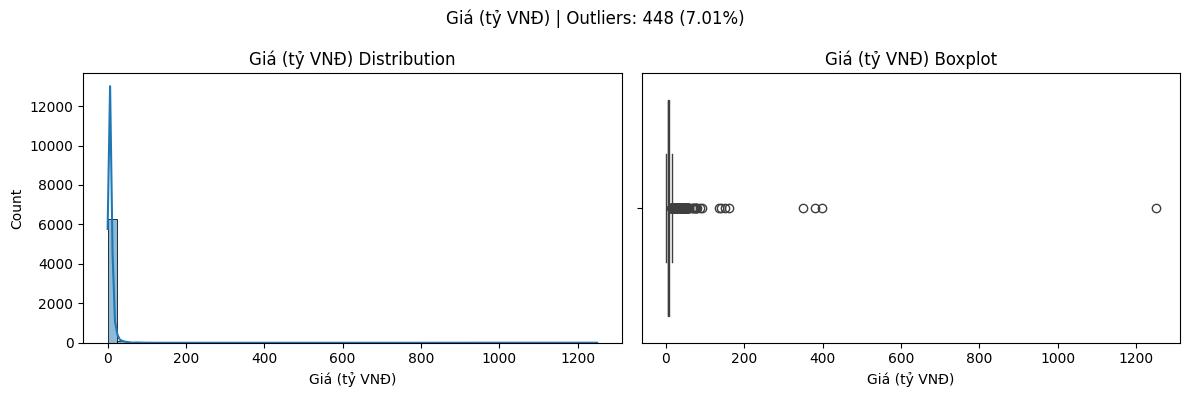

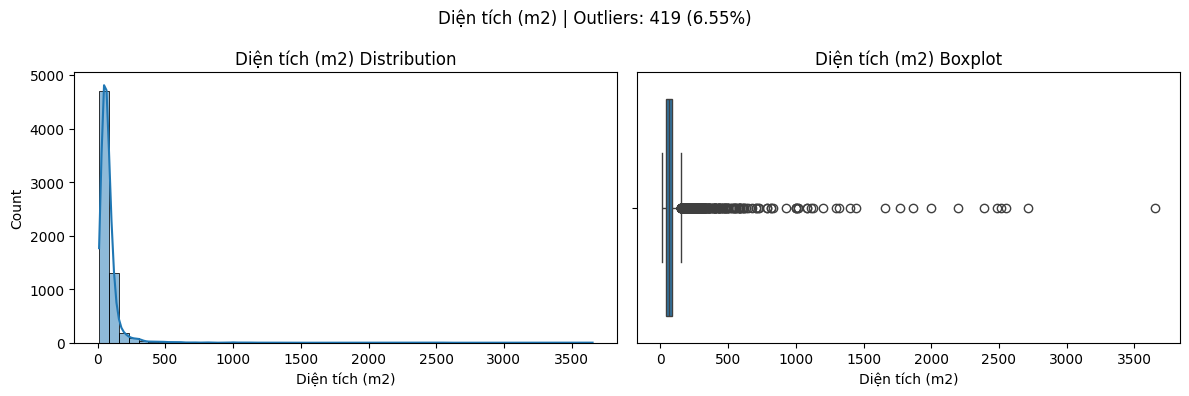

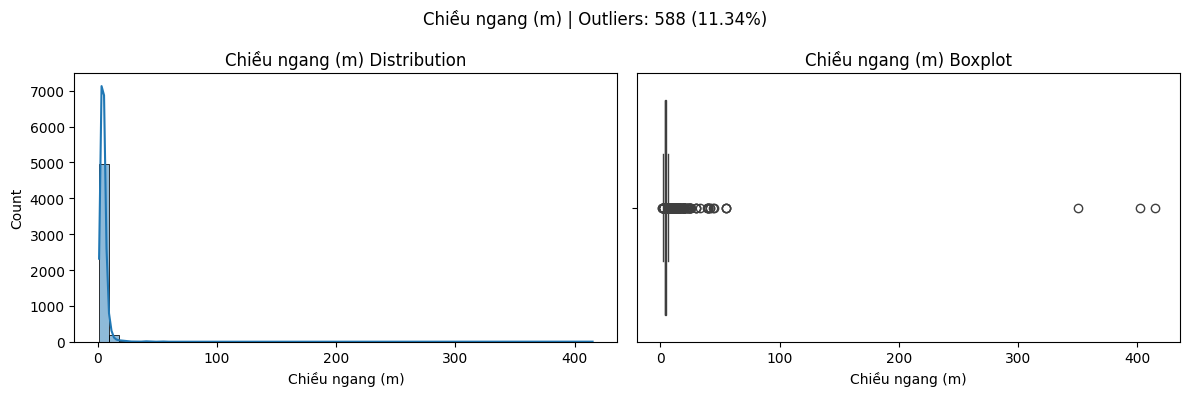

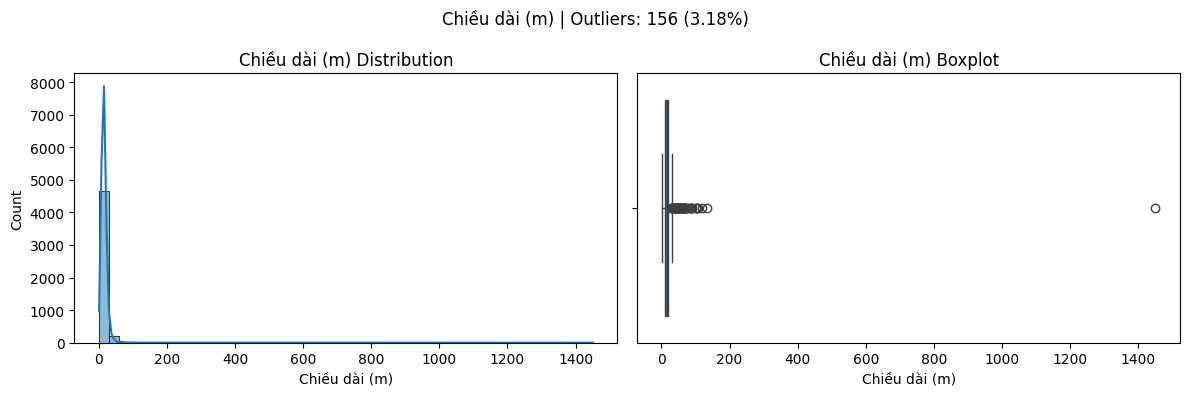

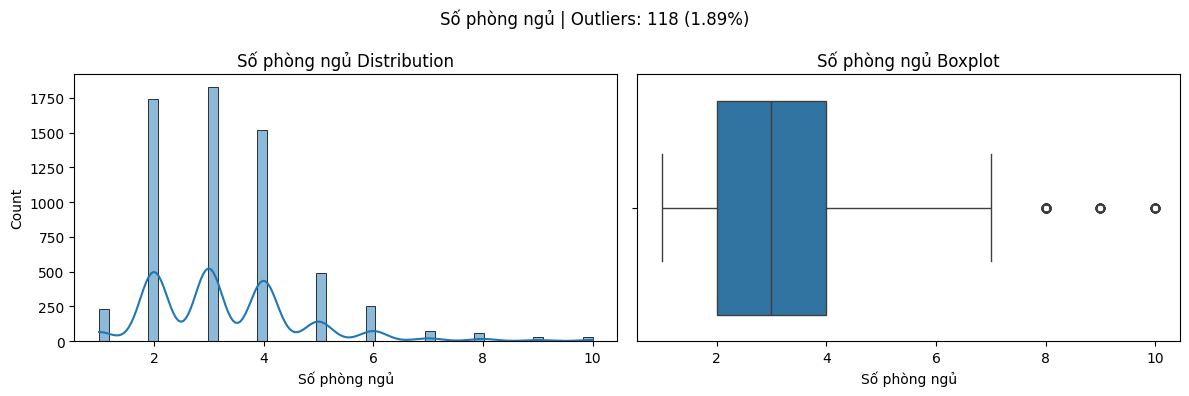

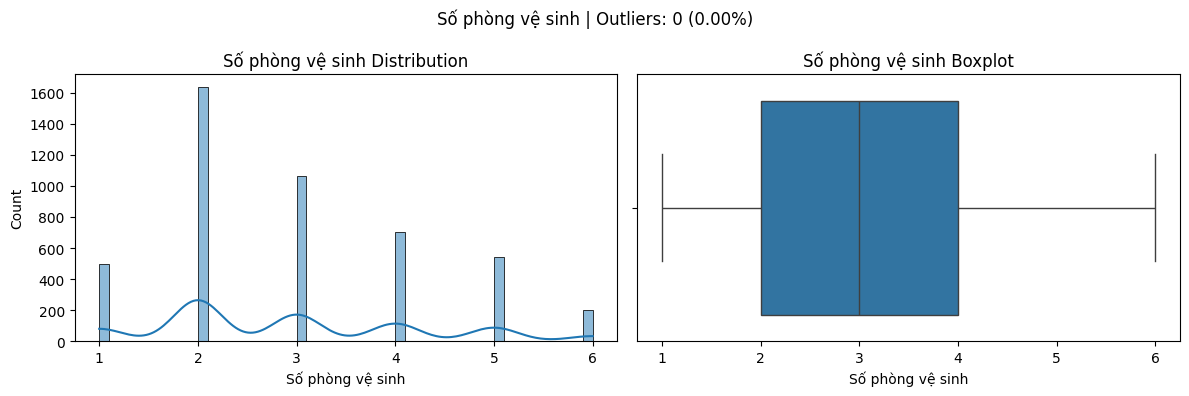

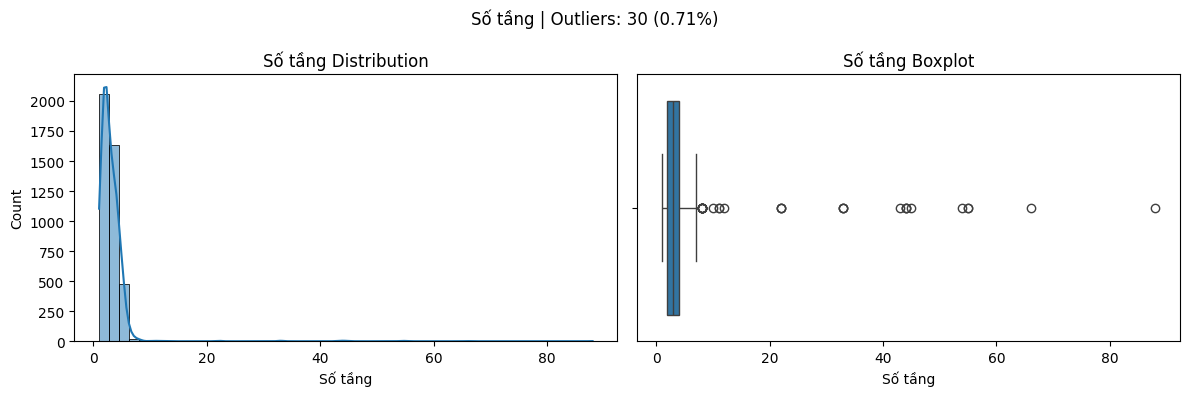

In [18]:
outlier_summary = []

for col in numeric_cols:
    data = df[col].dropna()
    
    outliers, lower, upper = count_outliers_iqr(data)
    ratio = outliers / len(data) * 100
    
    outlier_summary.append([col, outliers, round(ratio, 2)])
    
    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(data, bins=50, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} Distribution")
    
    sns.boxplot(x=data, ax=axes[1])
    axes[1].set_title(f"{col} Boxplot")
    
    plt.suptitle(f"{col} | Outliers: {outliers} ({ratio:.2f}%)")
    plt.tight_layout()
    plt.show()


In [19]:
outlier_df = pd.DataFrame(
    outlier_summary,
    columns=["Feature", "Outlier Count", "Outlier %"]
).sort_values("Outlier %", ascending=False)

outlier_df


,Feature,Outlier Count,Outlier %
2,Chiều ngang (m),588,11.34
0,Giá (tỷ VNĐ),448,7.01
1,Diện tích (m2),419,6.55
3,Chiều dài (m),156,3.18
4,Số phòng ngủ,118,1.89
6,Số tầng,30,0.71
5,Số phòng vệ sinh,0,0.00


In [20]:
import pandas as pd
df = pd.read_csv("cleaned_nhatot_data.csv")
nan_count = df.isna().sum()
nan_percent = nan_count / len(df) * 100
result = pd.DataFrame({
    "NaN_count": nan_count,
    "NaN_percent_%": nan_percent
})
print(result)


                     NaN_count  NaN_percent_%
Giá (tỷ VNĐ)                 1       0.015635
Thành phố                    0       0.000000
Phường/Xã                    1       0.015635
Diện tích (m2)               1       0.015635
Loại hình                    0       0.000000
Giấy tờ pháp lý              1       0.015635
Hướng                     4740      74.108818
Chiều ngang (m)           1212      18.949343
Chiều dài (m)             1498      23.420888
Số phòng ngủ               140       2.188868
Số phòng vệ sinh          1759      27.501563
Số tầng                   2183      34.130707
Tình trạng nội thất       3057      47.795497


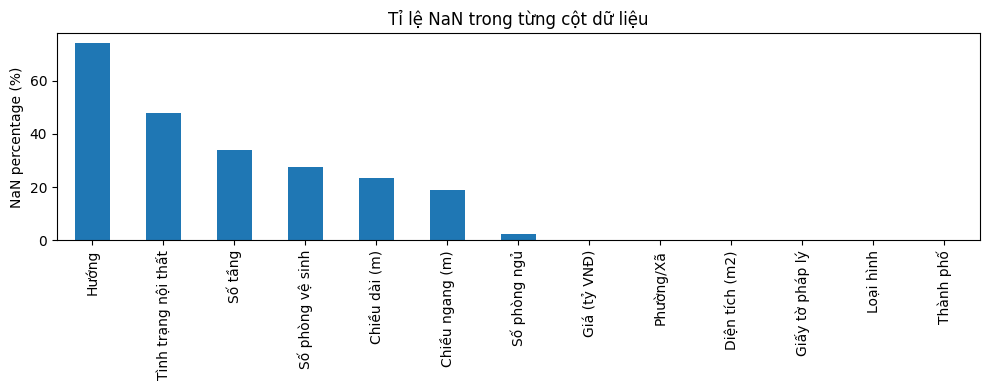

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_nhatot_data.csv")
nan_percent = df.isna().sum() / len(df) * 100

plt.figure(figsize=(10, 4))
nan_percent.sort_values(ascending=False).plot(kind='bar')
plt.ylabel("NaN percentage (%)")
plt.title("Tỉ lệ NaN trong từng cột dữ liệu")
plt.tight_layout()
plt.show()


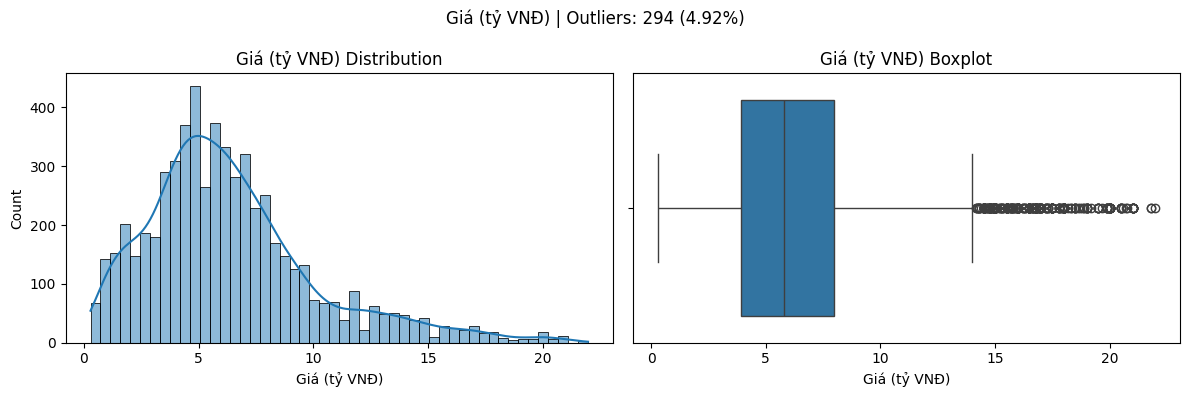

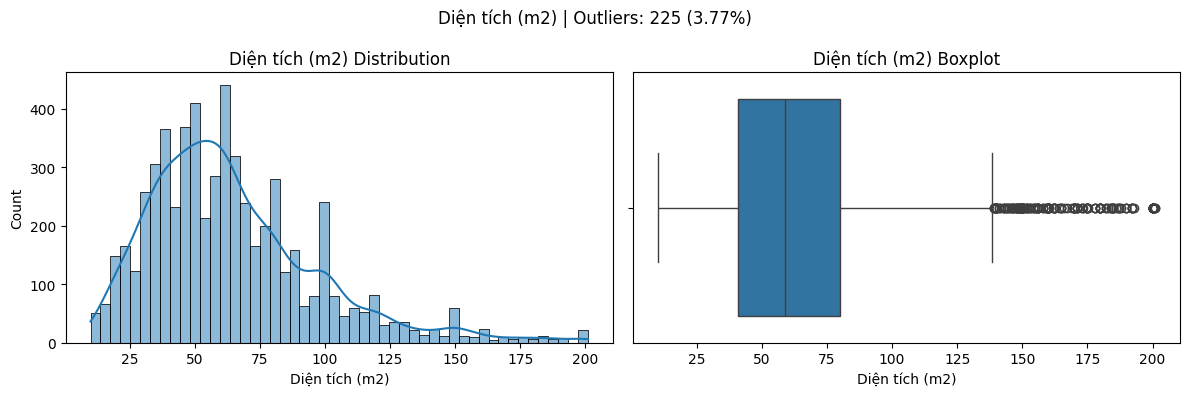

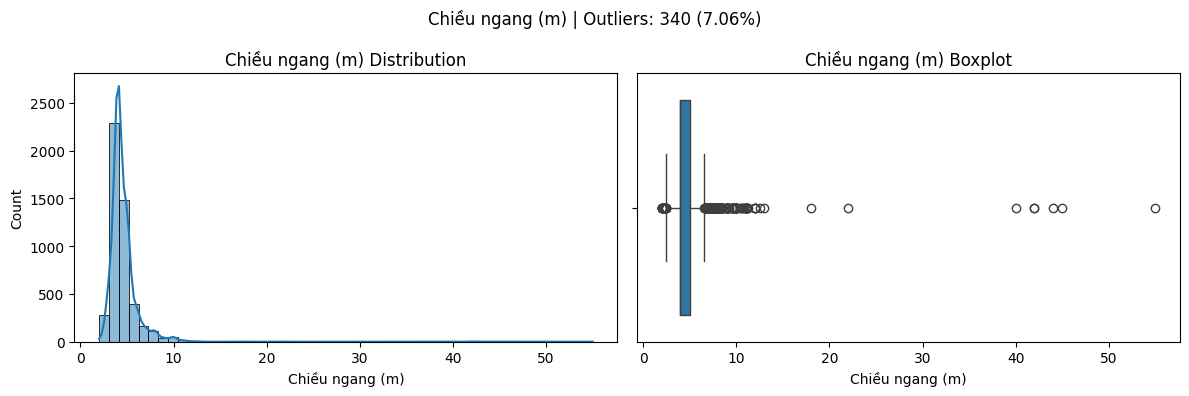

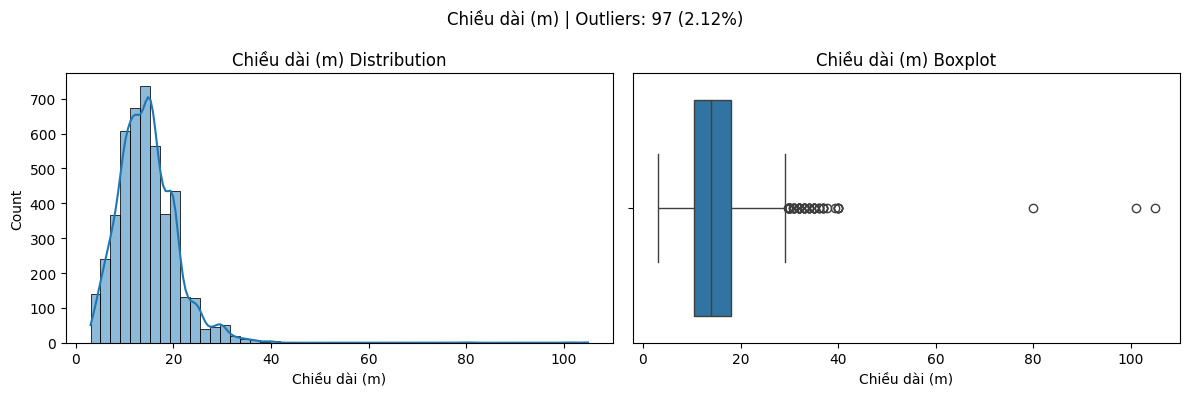

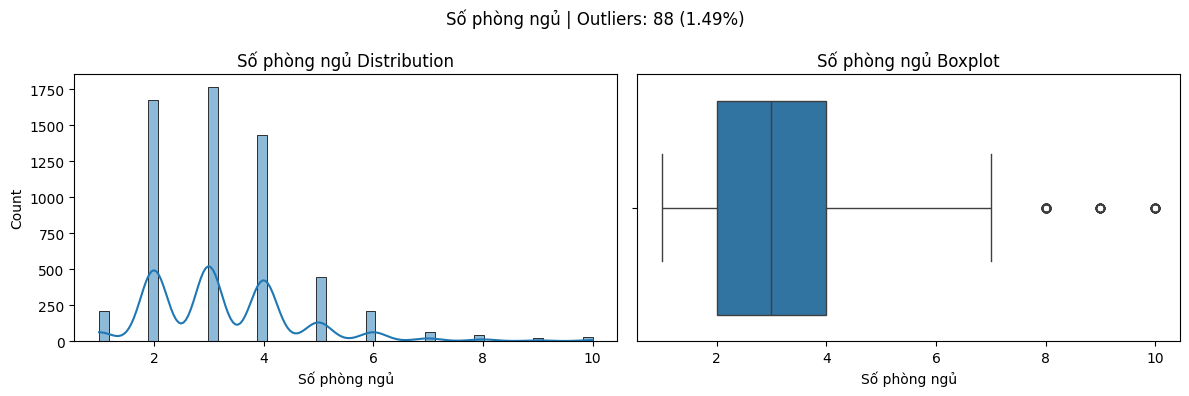

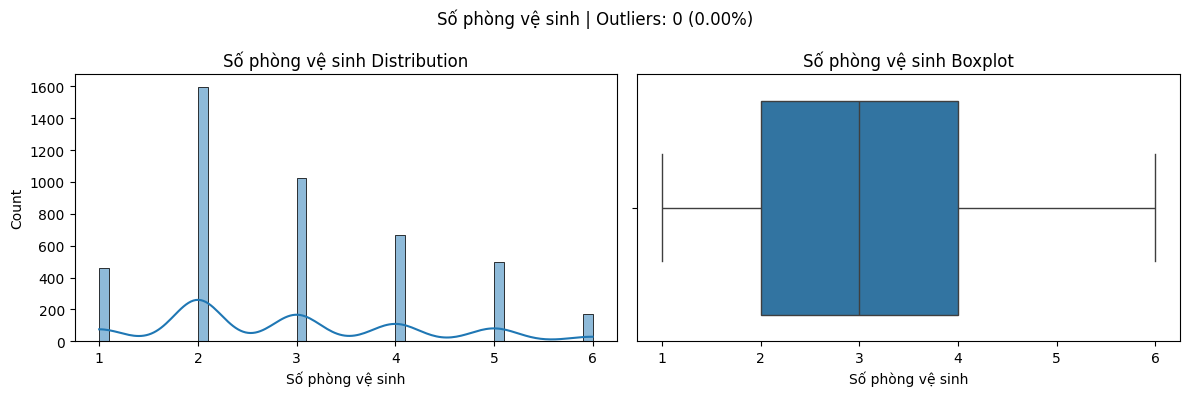

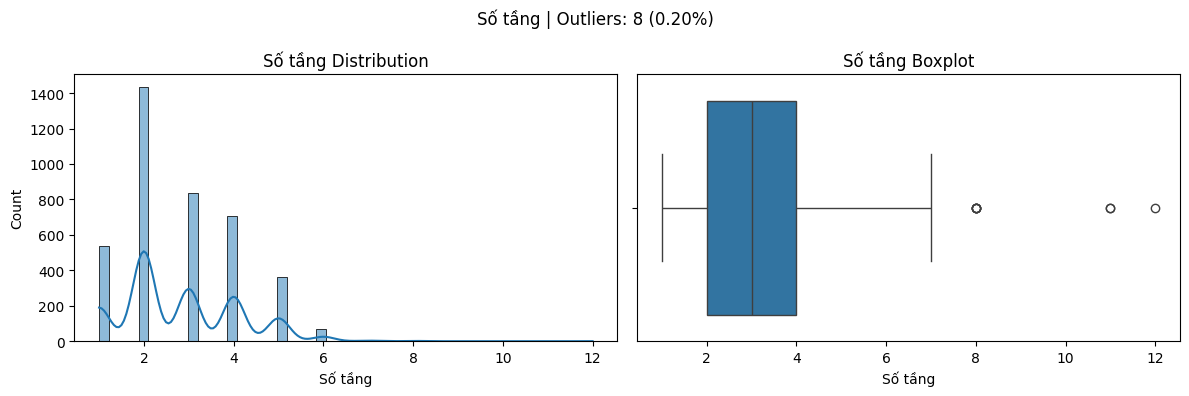

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("nooutlier_nhatot_data.csv", encoding="utf-8")

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns


def count_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum(), lower, upper

outlier_summary = []

for col in numeric_cols:
    data = df[col].dropna()
    
    outliers, lower, upper = count_outliers_iqr(data)
    ratio = outliers / len(data) * 100
    
    outlier_summary.append([col, outliers, round(ratio, 2)])
    
    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(data, bins=50, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} Distribution")
    
    sns.boxplot(x=data, ax=axes[1])
    axes[1].set_title(f"{col} Boxplot")
    
    plt.suptitle(f"{col} | Outliers: {outliers} ({ratio:.2f}%)")
    plt.tight_layout()
    plt.show()